- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks. I have analyzed the outputs here:

File name - all_params_afterrw.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)


In [7]:
import warnings
warnings.filterwarnings('ignore')

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import sys
sys.path.insert(0,'../pestools')

In [9]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model


In [10]:
import pestools

In [11]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [13]:
directory_name = 'all_params_afterrw.demo'
cf_name = 'rk_model_glm_cf_v1_allparams_rw' # Control file name

#### b. Parameter Sensitivity 

In [15]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,0.000033,0.001361,0.000011,0.000038,0.000031,0.000120,0.000025,0.000014,0.000038,0.000009,0.000003,0.000002,0.000016,1.691340e-13,0.000022,0.000050,11279.80,2479590.0,1.894170e-09,2.132830e-09
2,0.000047,0.002341,0.000013,0.000030,0.000025,0.000116,0.000029,0.000016,0.000031,0.000006,0.000003,0.000003,0.000009,1.208480e-06,0.000028,0.000043,4912.45,18758500.0,4.989550e-10,1.583850e-09
3,0.000136,0.003522,0.000014,0.000023,0.000030,0.000101,0.000027,0.000017,0.000027,0.000007,0.000003,0.000003,0.000009,4.999150e-08,0.000030,0.000047,1150.16,14758600.0,4.359200e-10,1.666640e-09
4,0.000224,0.004560,0.000014,0.000023,0.000028,0.000103,0.000030,0.000017,0.000036,0.000007,0.000004,0.000003,0.000009,1.681380e-06,0.000031,0.000046,38986.10,23594100.0,5.450430e-11,1.574020e-09
5,0.000145,0.003722,0.000014,0.000024,0.000028,0.000104,0.000029,0.000017,0.000026,0.000007,0.000004,0.000003,0.000009,7.901990e-08,0.000031,0.000047,23771.90,17612500.0,3.086840e-10,1.726940e-09
6,0.000158,0.003567,0.000014,0.000024,0.000028,0.000102,0.000025,0.000017,0.000018,0.000006,0.000003,0.000003,0.000009,1.180210e-06,0.000031,0.000048,22347.90,16069400.0,1.158310e-09,1.732730e-09
7,0.000198,0.003667,0.000015,0.000025,0.000029,0.000105,0.000025,0.000017,0.000019,0.000007,0.000003,0.000002,0.000007,2.819890e-07,0.000032,0.000048,51966.80,17593000.0,6.104890e-10,1.599170e-09
8,0.000160,0.003203,0.000015,0.000025,0.000029,0.000107,0.000023,0.000018,0.000016,0.000007,0.000003,0.000002,0.000007,1.639500e-06,0.000032,0.000048,40694.10,18001500.0,7.394480e-10,1.863560e-09
9,0.000158,0.003591,0.000015,0.000024,0.000030,0.000090,0.000025,0.000016,0.000017,0.000007,0.000003,0.000002,0.000006,1.349140e-06,0.000032,0.000051,128038.00,19312700.0,1.355200e-09,1.599680e-09


In [16]:
sen_iteration.iloc[0,:]

alpha_p    3.257930e-05
alpha_m    1.361200e-03
n_p        1.098960e-05
n_m        3.806920e-05
wr_p       3.060030e-05
wr_m       1.203850e-04
tcs_p      2.476600e-05
tcs_m      1.407890e-05
tcd_p      3.835980e-05
tcd_m      8.641980e-06
af_p       3.250480e-06
af_m       2.089010e-06
auf_p      1.586730e-05
auf_m      1.691340e-13
por_p      2.244000e-05
por_m      5.020920e-05
perm_p     1.127980e+04
perm_m     2.479590e+06
den_p      1.894170e-09
den_m      2.132830e-09
Name: 1, dtype: float64

In [17]:
len(sen_iteration.columns.values)

20

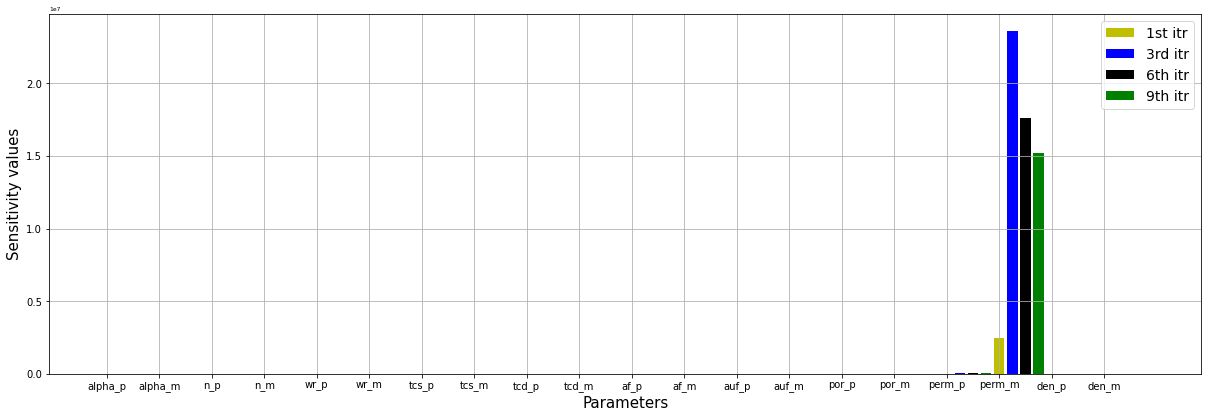

In [18]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[3,:], color='b', label='3rd itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[6,:], color='k', label='6th itr', width=0.2)
ax.bar(X + 0.75, sen_iteration.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid()

##### Relative sensitivity values

In [19]:
sen_iteration.iloc[0,:].max()

2479590.0

In [20]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
2,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
3,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
4,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
5,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
6,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
7,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
8,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16
9,1.313899e-11,5.489617e-10,4.432023e-12,1.535302e-11,1.234087e-11,4.855037e-11,9.987942e-12,5.677914e-12,1.547022e-11,3.485246e-12,1.310894e-12,8.424820e-13,6.399163e-12,6.821047e-20,9.049883e-12,2.024899e-11,0.004549,1.0,7.639045e-16,8.601543e-16


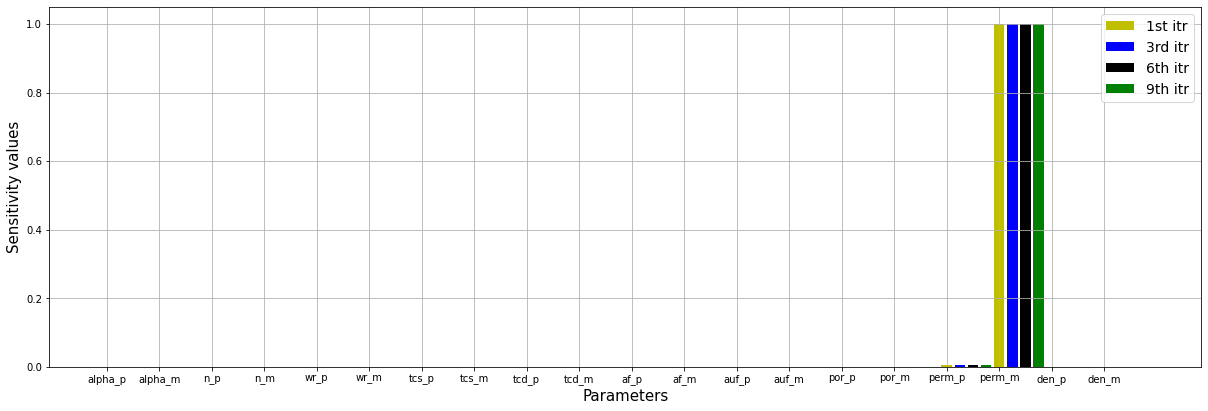

In [21]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[3,:], color='b', label='3rd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[6,:], color='k', label='6th itr', width=0.2)
ax.bar(X + 0.75, relative_set_itr.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid()

Comments:
    * The sensitivity of the parameters also depends on the lower and upper bounds - If the upper and lower bounds are provided with varying degree of change with respect to the initial value, then the parameter might also have a greater sensitivity. 
    * Next time - Fix the lower and upper bounds and check how the results change! - Try with the new parameter values! - Also add latent heat

### Plotting the change in parameters:


In [22]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.050000,0.005000,1.60000,1.50000,0.100000,0.120000,0.400000,1.000000,0.070000,1.000000,1.50000,1.50000,0.500000,0.700000,0.500000,0.500000,1.000000e-10,1.000000e-12,900,2300
1,0.040034,0.002549,1.59225,1.49193,0.128523,0.140024,0.407506,0.995647,0.084322,0.998514,1.50056,1.50041,0.497764,0.700000,0.528591,0.507581,2.607780e-10,1.000000e-13,900,2300
2,0.010000,0.001810,1.58018,1.48885,0.145391,0.151847,0.414057,0.990254,0.090439,0.996862,1.50089,1.50053,0.495849,0.699876,0.555416,0.504033,4.774730e-10,1.000000e-13,900,2300
3,0.010000,0.001761,1.57819,1.48881,0.148661,0.153005,0.415016,0.989609,0.090661,0.996633,1.50088,1.50043,0.495401,0.699876,0.558712,0.502688,4.774730e-11,1.000000e-13,900,2300
4,0.010000,0.001769,1.56460,1.48528,0.168785,0.154679,0.419815,0.983822,0.095227,0.994182,1.50114,1.49996,0.492737,0.699482,0.582022,0.498315,5.182330e-11,1.000000e-13,900,2300
5,0.010000,0.001788,1.55221,1.48302,0.186254,0.154560,0.424573,0.977830,0.096350,0.992395,1.50174,1.49978,0.491573,0.699482,0.600845,0.496206,4.130980e-11,1.000000e-13,900,2300
6,0.010000,0.001814,1.54307,1.48139,0.196875,0.153544,0.426768,0.972219,0.098545,0.990422,1.50245,1.49968,0.490568,0.699199,0.612288,0.494544,1.000000e-11,1.000000e-13,900,2300
7,0.010000,0.001777,1.53179,1.48063,0.206183,0.153264,0.431366,0.965938,0.099297,0.988191,1.50308,1.49945,0.490150,0.699199,0.623347,0.491316,2.897860e-11,1.000000e-13,900,2300
8,0.010000,0.001519,1.52203,1.48199,0.212503,0.156316,0.434045,0.960838,0.102681,0.986875,1.50339,1.49933,0.488158,0.699199,0.628530,0.486280,1.000000e-11,1.000000e-13,900,2300


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [23]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.0000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0,0
1,-19.9316,-49.0172,-0.484375,-0.538000,28.523,16.686667,1.87650,-0.4353,20.460429,-0.1486,0.037333,0.027333,-0.4472,0.000000,5.7182,1.5162,160.7780,-90.0,0,0
2,-80.0000,-63.8074,-1.238750,-0.743333,45.391,26.539167,3.51425,-0.9746,29.198857,-0.3138,0.059333,0.035333,-0.8302,-0.017714,11.0832,0.8066,377.4730,-90.0,0,0
3,-80.0000,-64.7826,-1.363125,-0.746000,48.661,27.504167,3.75400,-1.0391,29.516000,-0.3367,0.058667,0.028667,-0.9198,-0.017714,11.7424,0.5376,-52.2527,-90.0,0,0
4,-80.0000,-64.6240,-2.212500,-0.981333,68.785,28.899167,4.95375,-1.6178,36.038714,-0.5818,0.076000,-0.002667,-1.4526,-0.074000,16.4044,-0.3370,-48.1767,-90.0,0,0
5,-80.0000,-64.2386,-2.986875,-1.132000,86.254,28.800000,6.14325,-2.2170,37.642429,-0.7605,0.116000,-0.014667,-1.6854,-0.074000,20.1690,-0.7588,-58.6902,-90.0,0,0
6,-80.0000,-63.7130,-3.558125,-1.240667,96.875,27.953333,6.69200,-2.7781,40.778429,-0.9578,0.163333,-0.021333,-1.8864,-0.114429,22.4576,-1.0912,-90.0000,-90.0,0,0
7,-80.0000,-64.4630,-4.263125,-1.291333,106.183,27.720000,7.84150,-3.4062,41.853571,-1.1809,0.205333,-0.036667,-1.9700,-0.114429,24.6694,-1.7368,-71.0214,-90.0,0,0
8,-80.0000,-69.6170,-4.873125,-1.200667,112.503,30.263333,8.51125,-3.9162,46.687143,-1.3125,0.226000,-0.044667,-2.3684,-0.114429,25.7060,-2.7440,-90.0000,-90.0,0,0


#### Line plot of all parameter values


In [24]:
for i, value in enumerate(par_change.columns):
    print(i, value)

0 alpha_p
1 alpha_m
2 n_p
3 n_m
4 wr_p
5 wr_m
6 tcs_p
7 tcs_m
8 tcd_p
9 tcd_m
10 af_p
11 af_m
12 auf_p
13 auf_m
14 por_p
15 por_m
16 perm_p
17 perm_m
18 den_p
19 den_m


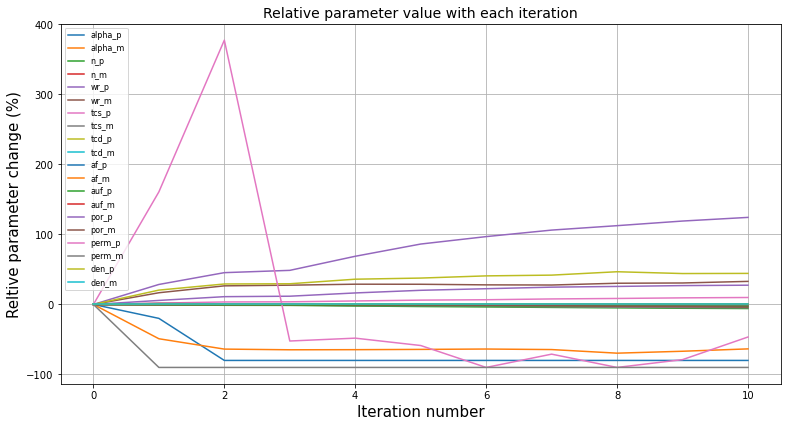

In [27]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

### c. Objective function

In [28]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_4.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000912
1,stemp_0.04_1,temp,261.0067,262.660399,-1.653699,0.000912
2,stemp_0.04_2,temp,260.8549,261.949082,-1.094182,0.000912
3,stemp_0.04_3,temp,261.0327,262.174263,-1.141563,0.000912
4,stemp_0.04_4,temp,261.3470,262.149776,-0.802776,0.000912


#### Analyzing the residual weights:


In [30]:
res_1['Weight'].describe()

count    5110.000000
mean        0.000526
std         0.000386
min         0.000140
25%         0.000140
50%         0.000526
75%         0.000912
max         0.000912
Name: Weight, dtype: float64

In [31]:
res_1['Weight'].unique()

array([0.00091163, 0.00014   ])

In [32]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [33]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000912,-0.008320,9.126700,0.008320,0.000069,0.785316
1,stemp_0.04_1,temp,261.0067,263.425923,-2.419223,0.000912,-0.002205,2.419223,0.002205,0.000005,0.055178
2,stemp_0.04_2,temp,260.8549,262.604426,-1.749526,0.000912,-0.001595,1.749526,0.001595,0.000003,0.028857
3,stemp_0.04_3,temp,261.0327,262.690810,-1.658110,0.000912,-0.001512,1.658110,0.001512,0.000002,0.025921
4,stemp_0.04_4,temp,261.3470,262.606543,-1.259543,0.000912,-0.001148,1.259543,0.001148,0.000001,0.014957


In [34]:
res_phi_1['Weighted_Sq_Residual'].mean()

1.7250314058468452e-06

In [35]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,17.250314
2,15.612728
3,15.511729
4,14.911467
5,14.53769


In [36]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [37]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.010724,0.010724,0,0.005362,0.005362
1,31,0.008815,0.008815,0,0.005301,0.003513
2,61,0.007978,0.007978,0,0.005182,0.002796
3,111,0.007926,0.007926,0,0.005177,0.002749
4,161,0.007620,0.007620,0,0.005100,0.002520
5,211,0.007429,0.007429,0,0.005066,0.002363
6,259,0.007327,0.007327,0,0.005049,0.002277
7,309,0.007247,0.007247,0,0.005029,0.002217
8,359,0.007189,0.007189,0,0.005046,0.002143
9,409,0.007122,0.007122,0,0.004989,0.002133


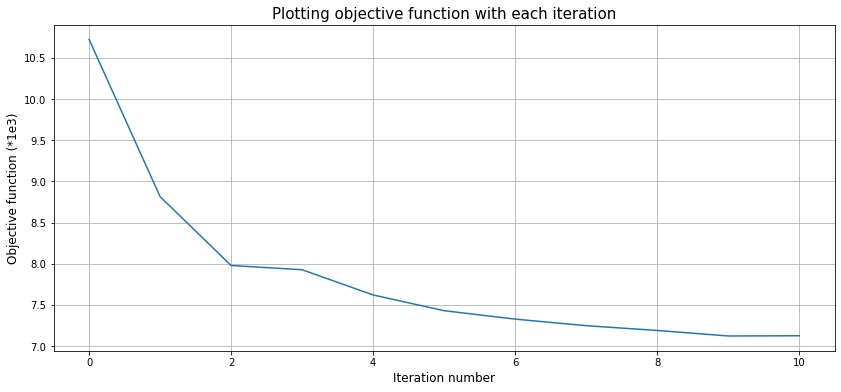

<Figure size 720x432 with 0 Axes>

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

**Comments:**
- The objective function is reducing with each iteration.

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [39]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

9

In [40]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000912,-0.008320,9.126700,0.008320,6.922492e-05,0.972014
1,stemp_0.04_1,temp,261.0067,262.426645,-1.419945,0.000912,-0.001294,1.419945,0.001294,1.675631e-06,0.023528
2,stemp_0.04_2,temp,260.8549,261.753327,-0.898427,0.000912,-0.000819,0.898427,0.000819,6.708110e-07,0.009419
3,stemp_0.04_3,temp,261.0327,262.022498,-0.989798,0.000912,-0.000902,0.989798,0.000902,8.141935e-07,0.011432
4,stemp_0.04_4,temp,261.3470,262.016905,-0.669905,0.000912,-0.000611,0.669905,0.000611,3.729591e-07,0.005237


In [41]:
temp_measured = res_best.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_best.iloc[2555:,2]

temp_sim = res_best.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[2555:,3]

temp_res = res_best.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[2555:,4]

Text(0.5, 0, 'Days')

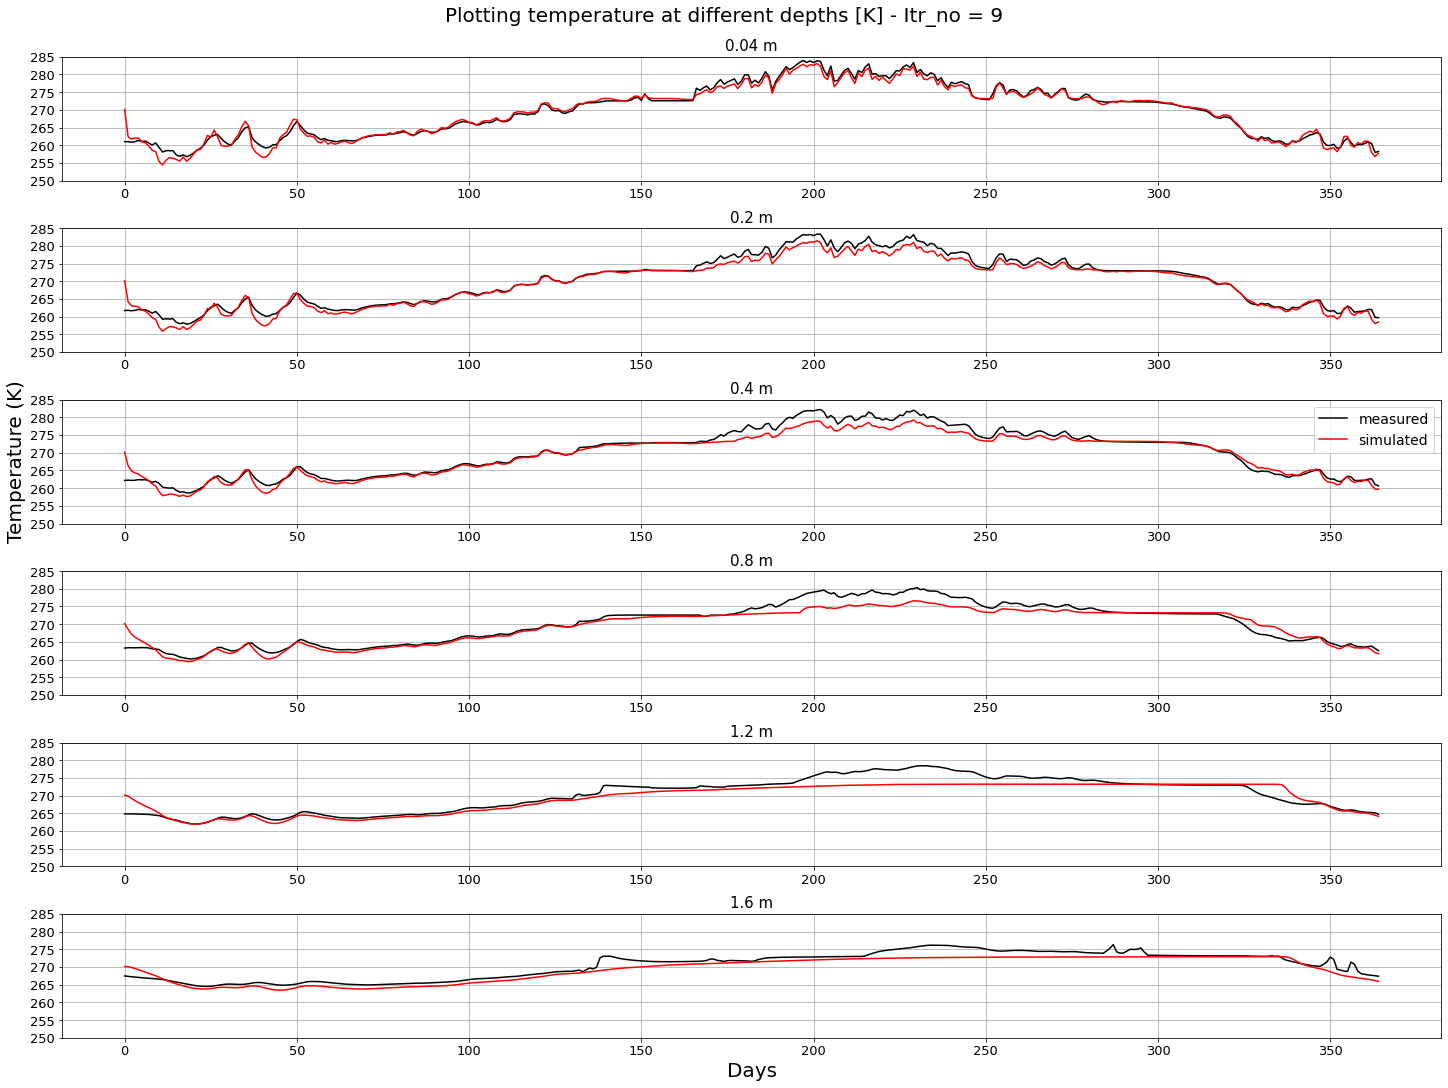

In [42]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


In [43]:
mois_measured.head()

2555    8.001889
2556    8.008944
2557    8.001986
2558    8.016035
2559    8.037118
Name: Measured, dtype: float64

Text(0.5, 0, 'Days')

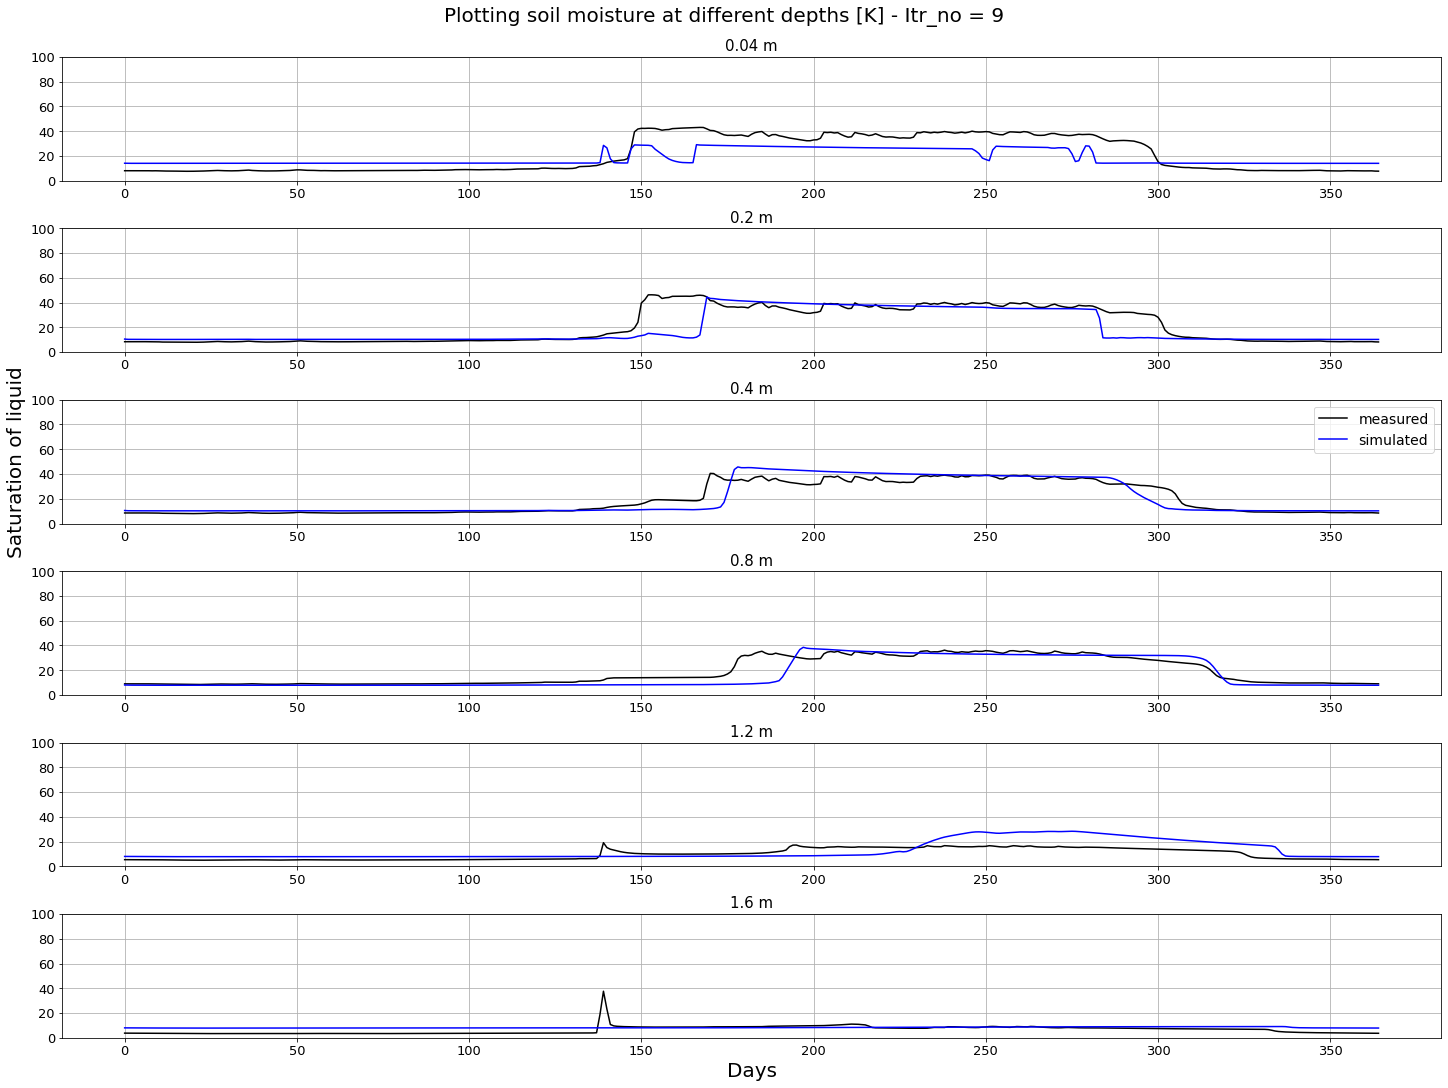

In [44]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

In [45]:
mois_measured[4519]

37.60354

<Figure size 720x432 with 0 Axes>

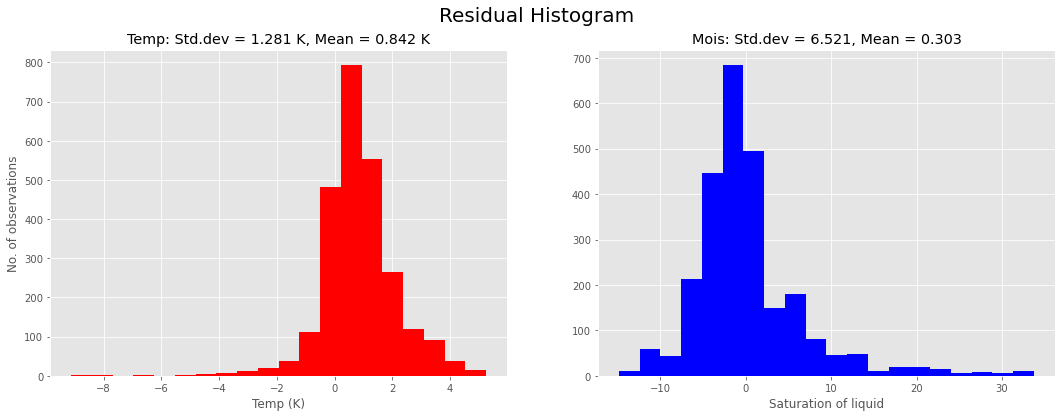

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [47]:
temp_res.describe()

count    2555.000000
mean        0.841796
std         1.281184
min        -9.126700
25%         0.171662
50%         0.743407
75%         1.402299
max         5.244257
Name: Residual, dtype: float64

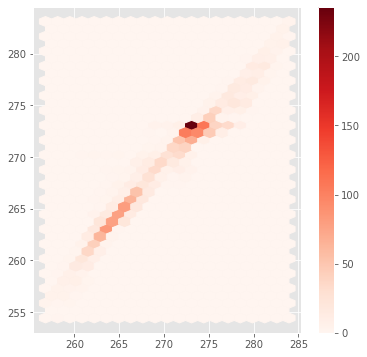

In [48]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

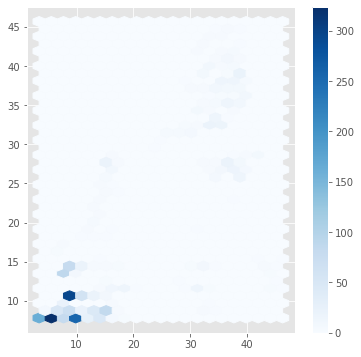

In [49]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

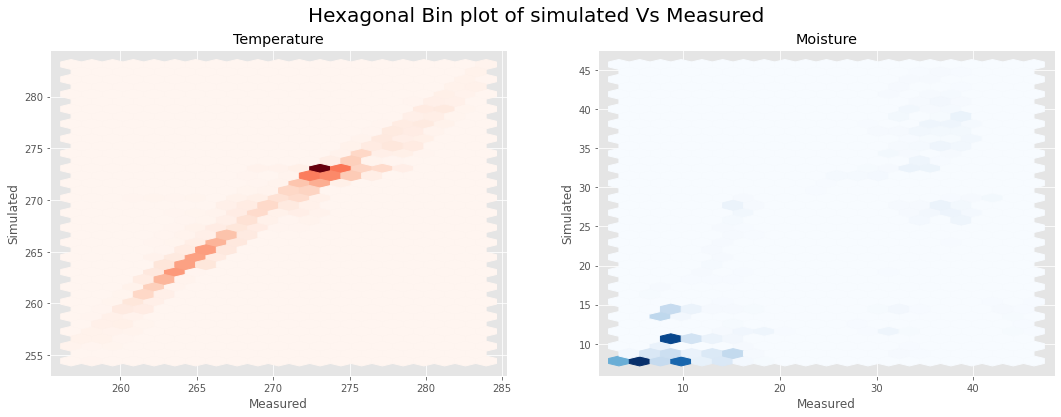

In [50]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [51]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.010724,0.010724,0,0.005362,0.005362
1,31,0.008815,0.008815,0,0.005301,0.003513
2,61,0.007978,0.007978,0,0.005182,0.002796
3,111,0.007926,0.007926,0,0.005177,0.002749
4,161,0.007620,0.007620,0,0.005100,0.002520
5,211,0.007429,0.007429,0,0.005066,0.002363
6,259,0.007327,0.007327,0,0.005049,0.002277
7,309,0.007247,0.007247,0,0.005029,0.002217
8,359,0.007189,0.007189,0,0.005046,0.002143
9,409,0.007122,0.007122,0,0.004989,0.002133


In [52]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([4988.67, 2133.13])

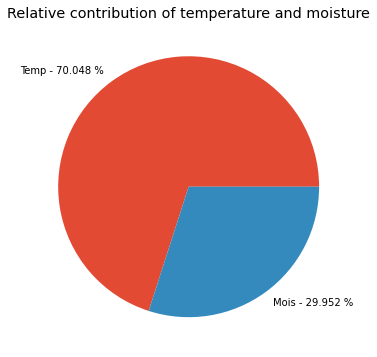

In [53]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables

### Reweighting strategy: